
"""
More Variables :

Total Races from current race
- Races in the last 7/14/28/60/90/180/365/730 days 
- Races won in the 7/14/28/60/90/180/365/730 days
- Races placed in the 7/14/28/60/90/180/365/730 days


"""


# Import the code 


In [1]:

#fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one/code/Users/karan.bhatti'
fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti'

import sys
print(sys.path)
print()
#sys.path.append(f'{fileloc}')
print()
#print(sys.path)


['/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti', '/anaconda/envs/azureml_py38/lib/python38.zip', '/anaconda/envs/azureml_py38/lib/python3.8', '/anaconda/envs/azureml_py38/lib/python3.8/lib-dynload', '', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/_project/vendor', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/automl/core/_vendor']




In [2]:

class Data(object):
    pass

df = Data
summ = Data


In [3]:
import helpdesk as hd

In [4]:

import pandas as pd, numpy as np
from datetime import datetime


In [5]:
DEBUG = True

In [6]:

pd.set_option('display.max_rows', 50);
pd.set_option('display.max_columns', 50);
pd.set_option('display.width', 200);


In [7]:

# Importing Dog Race Results

#res_raw = pd.read_csv('C:\\Users\\karan\\Documents\\Data\\racing\\FastTrack\\Past\\dog_results_20211201_20211231.csv')
#df.res_raw = pd.read_csv('C:\\Users\\karan\\Documents\\Data\\racing\\FastTrack\\Past\\dog_results_20220101_20220531.csv')

print(f'{fileloc}/dog_results_2022Q1_2022Q2.csv')

df.res_raw_2021Q1Q4 = pd.read_csv(f'{fileloc}/dog_results_2021Q1_2021Q4.csv')
print(df.res_raw_2021Q1Q4.columns.values.tolist())
print(df.res_raw_2021Q1Q4.shape)

df.res_raw_2022Q1Q2 = pd.read_csv(f'{fileloc}/dog_results_2022Q1_2022Q2.csv')
print(df.res_raw_2022Q1Q2.columns.values.tolist())
print(df.res_raw_2022Q1Q2.shape)



/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/dog_results_2022Q1_2022Q2.csv
['@id', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName']
(435715, 19)
['@id', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName']
(320052, 19)


In [8]:

df.res_raw = df.res_raw_2021Q1Q4.append( df.res_raw_2022Q1Q2 )
print(df.res_raw.columns.values.tolist())
print(df.res_raw.shape)


['@id', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName']
(755767, 19)


In [9]:

df.res_raw.loc[:,"DogName"] = df.res_raw["DogName"].str.replace("'","").str.replace(".","")
if DEBUG: print(df.res_raw.shape) 
# 320 052

#if DEBUG: res_raw[ ~(res_raw.Place.isin( ['D','F','N','R','S','T',''])) ].shape # 66608
if DEBUG: print(df.res_raw[ ~(df.res_raw.Place.isin( ['R','S'])) ].shape) 
# 275 864

df.res_raw2 = df.res_raw[ ~(df.res_raw.Place.isin( ['R','S']))  ]
df.res_ = df.res_raw2[~df.res_raw2.Place.isna()]
if DEBUG: print(df.res_.shape) 
# 273 735

del df.res_raw, df.res_raw2

#res_ = res_raw


(755767, 19)
(649399, 19)
(644761, 19)


In [10]:

# Importing Race Details 

#race_raw = pd.read_csv('C:\\Users\\karan\\Documents\\Data\\racing\\FastTrack\\Past\\race_details_20211201_20211231.csv', parse_dates = True)
#df.race_raw = pd.read_csv('C:\\Users\\karan\\Documents\\Data\\racing\\FastTrack\\Past\\race_details_20220101_20220531.csv', parse_dates = True)

print(f'{fileloc}/race_details_2022Q1_2022Q2.csv')

df.race_raw_2022Q1Q2 = pd.read_csv(f'{fileloc}/race_details_2022Q1_2022Q2.csv', parse_dates = True)
print(df.race_raw_2022Q1Q2.columns.values.tolist())
print(df.race_raw_2022Q1Q2.shape)

df.race_raw_2021Q1Q4 = pd.read_csv(f'{fileloc}/race_details_2021Q1_2021Q4.csv', parse_dates = True)
print(df.race_raw_2021Q1Q4.columns.values.tolist())
print(df.race_raw_2021Q1Q4.shape)


/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/race_details_2022Q1_2022Q2.csv
['@id', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date']
(38562, 8)
['@id', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date']
(51833, 8)


In [11]:

df.race_raw = df.race_raw_2021Q1Q4.append( df.race_raw_2022Q1Q2 )
print(df.race_raw.columns.values.tolist())
print(df.race_raw.shape)


['@id', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date']
(90395, 8)


In [12]:

df.race_raw['Event_Dt'] = pd.to_datetime(df.race_raw['date']).dt.date

#dtvalct = race_raw.Event_Dt.value_counts()

df.race_raw.loc[df.race_raw.Track.isin(['Murray Bridge (MBR)','Murray Bridge (MBS)']), "Track"] = 'Murray Bridge'
df.race_raw.loc[df.race_raw.Track.isin(['Richmond (RIS)']), "Track"] = 'Richmond'

df.race_raw.loc[df.race_raw.Track.isin(['Sandown (SAP)']), "Track"] = 'Sandown Park'

df.race_raw.loc[df.race_raw.Track.isin(['Meadows (MEP)']), "Track"] = 'Meadows'
df.race_raw.loc[df.race_raw.Track.isin(['The Meadows']), "Track"] = 'Meadows'


if DEBUG : print(df.race_raw.shape)

# 2021
# 52,103 Races

# 2022 upto May
# 21,002 Races

# 2022 Q1/Q2
# 38,562 Races

# 2022 Q1/Q2 + 2021 Q1/Q2/Q3/Q4
# 81,412 Races

df.race_ = df.race_raw[ ~df.race_raw.Track.str.contains('NZ')]

if DEBUG : print(df.race_.shape)

del df.race_raw

if DEBUG: print(df.race_.dtypes)



(90395, 9)
(81412, 9)
@id           int64
RaceNum       int64
RaceName     object
RaceTime     object
Distance     object
RaceGrade    object
Track        object
date         object
Event_Dt     object
dtype: object


In [13]:

if DEBUG:
    print(df.res_.columns.values.tolist())
    print(df.race_.columns.values.tolist())
    
    print(df.res_.shape)
    print(df.race_.shape)

df.ft_raw = pd.merge(df.res_, df.race_, left_on = 'RaceId', right_on = '@id', how = 'inner', suffixes=('_DOG', '_RACE'))
if DEBUG: print(df.ft_raw.shape)

# 2021
# 333,285

# 2022 upto May
# 132,558

# 2022 Q1/Q2
# 245,827

# 2022 Q1/Q2 + 2021 Q1/Q2/Q3/Q4
# 245,827

#qc_DogName = df.ft_merg.DogName.value_counts()


['@id', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName']
['@id', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt']
(644761, 19)
(81412, 9)
(577317, 28)


### A) Prepare the Base Dataset -- Exclusions (Missing ft sp, place info, Margin1, num_dogs)

In [14]:

print(df.ft_raw.columns.values.tolist())


['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt']


In [15]:

# Find the Places to be removed
print( pd.DataFrame(df.ft_raw['Place'].value_counts()).transpose() )


           1      2      3      4      5      6      7      8     F     T    N   3=   4=   2=   5=   1=   6=    P   7=   B   D
Place  80621  80259  80031  79721  78416  72837  58238  38959  3402  1199  998  476  423  416  373  306  271  222  114  21  14


In [17]:

# Delete races where ft_sp is blank
all_races = df.ft_raw['@id_RACE'].unique().tolist()
print(len(all_races))
print()

print("# Part 1 - Removing Races with missing fast track prices - can't be measured for performance")
# Clean the fast track prices
df.ft_raw['ft_sp'] = df.ft_raw.StartPrice.apply(lambda x : float(str(x).replace("$","").replace("F","")) )

blank_ft_sp_races = df.ft_raw[df.ft_raw['ft_sp'].isna()]['@id_RACE'].unique().tolist()
#print(len(blank_ft_sp_races))
df_base0 = df.ft_raw[ ( ~df.ft_raw['@id_RACE'].isin(blank_ft_sp_races) ) ]
print(f"Shape : {df_base0.shape}, Races : {len(df_base0['@id_RACE'].unique().tolist())}, Race w missing fast track prices : {len(blank_ft_sp_races)}")
print()

print("# Part 2 - Removing Races with Missing Place Information")
place_to_remove = ['F','T','N','P','B','D']
races_excl_pos = df_base0[df_base0['Place'].isin(place_to_remove)]['@id_RACE'].unique().tolist()
#print(len(races_excl_pos))

df_base1 = df_base0[ ( ~df_base0['@id_RACE'].isin(races_excl_pos) ) ]
print(f"Shape : {df_base1.shape}, Races : {len(df_base1['@id_RACE'].unique().tolist())}, Races w missing Place : {len(races_excl_pos)}")
print()

print("# Part 3 - Removing Races with no Missing Margin1 information")
races_excl_margin = df_base1[df_base1['Margin1'].isna()]['@id_RACE'].unique().tolist()
#print(len(races_excl_margin))

df_base2 = df_base1[ ( ~df_base1['@id_RACE'].isin(races_excl_margin) ) ]
print(f"Shape : {df_base2.shape}, Races : {len(df_base2['@id_RACE'].unique().tolist())}, Races w missing Margin : {len(races_excl_margin)}")

del df_base0, df_base1


80909

# Part 1 - Removing Races with missing fast track prices - can't be measured for performance
Shape : (569648, 29), Races : 79518, Race w missing fast track prices : 1391

# Part 2 - Removing Races with Missing Place Information
Shape : (541552, 29), Races : 75740, Races w missing Place : 3778

# Part 3 - Removing Races with no Missing Margin1 information
Shape : (541527, 29), Races : 75721, Races w missing Margin : 19


In [20]:

print("# Part 4 - Removing Races with under 5 dogs")
df_num_dogs = df_base2.groupby("@id_RACE").agg( { '@id_DOG':'nunique' } ).reset_index().rename(columns = {'@id_DOG':'x_num_dogs'})

print(df_num_dogs.shape)
print(df_base2.shape)
print()

df_base3 = pd.merge( df_base2, df_num_dogs, on = ["@id_RACE"], how = 'left')
print(df_base3.columns.values.tolist())
print()

races_u5dogs = df_base3[df_base3.x_num_dogs.isin([1,2,3,4])]['@id_RACE'].unique().tolist()
print(len(races_u5dogs))
print()

print( len(df_base3['@id_RACE'].unique().tolist()))
df_base = df_base3[ ( ~df_base3['@id_RACE'].isin(races_u5dogs) ) ].copy()   
print()

#print(df.ft.shape)
print(f"Shape : {df_base.shape}, Races : {len(df_base['@id_RACE'].unique().tolist())}, Races u5 Dogs : {len(races_u5dogs)}")
print()

del df_base2, df_base3


# Part 4 - Removing Races with under 5 dogs
(75721, 2)
(541527, 29)

['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'ft_sp', 'x_num_dogs']

1243

75721

Shape : (536782, 30), Races : 74478, Races u5 Dogs : 1243



In [21]:
df_base.sort_values(by = ['@id_DOG', 'DogName', 'Event_Dt'], inplace = True)

In [22]:

#df_base0[df_base0.DogName.isin(['FOURTH DIMENTION'])].head()
df_base[df_base['@id_RACE'].isin([631783547]) ]


,@id_DOG,Place,DogName,Box,Rug,Weight,StartPrice,Handicap,Margin1,Margin2,PIR,Checks,Comments,SplitMargin,RunTime,Prizemoney,RaceId,TrainerId,TrainerName,@id_RACE,RaceNum,RaceName,RaceTime,Distance,RaceGrade,Track,date,Event_Dt,ft_sp,x_num_dogs
10697,114244064,2,FOURTH DIMENTION,3.0,3,33.4,$4.20,NaN,0.39,0.39,M/22,1,NaN,8.36,22.75,NaN,631783547,131578,P Pollutro,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,4.2,8
10698,157829531,3,TUI,4.0,4,29.3,$8.50,NaN,3.60,3.21,M/43,4,NaN,8.47,22.97,NaN,631783547,110965,C Haigh,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,8.5,8
10701,164415675,6,BIG PLANS,2.0,2,39.7,$9.10,NaN,8.80,1.21,M/68,0,NaN,8.62,23.34,NaN,631783547,255489,K Thorburn,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,9.1,8
10700,184236240,5,CEE JAY ACE,1.0,1,33.0,$2.80F,NaN,7.59,2.23,S/86,1,NaN,8.73,23.25,NaN,631783547,283109,L Dalziel,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,2.8,8
10699,190918076,4,BANJO PLATO,8.0,8,33.1,$14.10,NaN,5.36,1.76,S/75,0,NaN,8.64,23.10,NaN,631783547,65076,D Belsham,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14.1,8
10702,224008138,7,HEIDI INTENTION,7.0,7,25.7,$6.20,NaN,14.94,6.14,M/57,11,NaN,8.48,23.77,NaN,631783547,27599,J Caley,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,6.2,8
10696,314053857,1,PARUMBA BARCIA,6.0,6,30.2,$14.50,NaN,0.39,NaN,M/11,1,NaN,8.29,22.72,NaN,631783547,132501,E Lieshout,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14.5,8
10703,340020191,8,HURRICANE PETE,5.0,5,32.7,$18.10,NaN,16.19,1.24,M/34,15,NaN,8.43,23.85,NaN,631783547,69852,J Sultana,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,18.1,8


In [25]:

# Fix the position Variable
df_base['position'] = df_base.Place.apply(lambda x : x.replace("=","") if x in ['1=','2=','3=','4=','5=','6=','7=','8='] else x)
print(pd.DataFrame(df_base.position.value_counts()).transpose())


              1      2      3      4      5      6      7      8
position  74620  74533  74503  74453  74453  69445  55908  38867


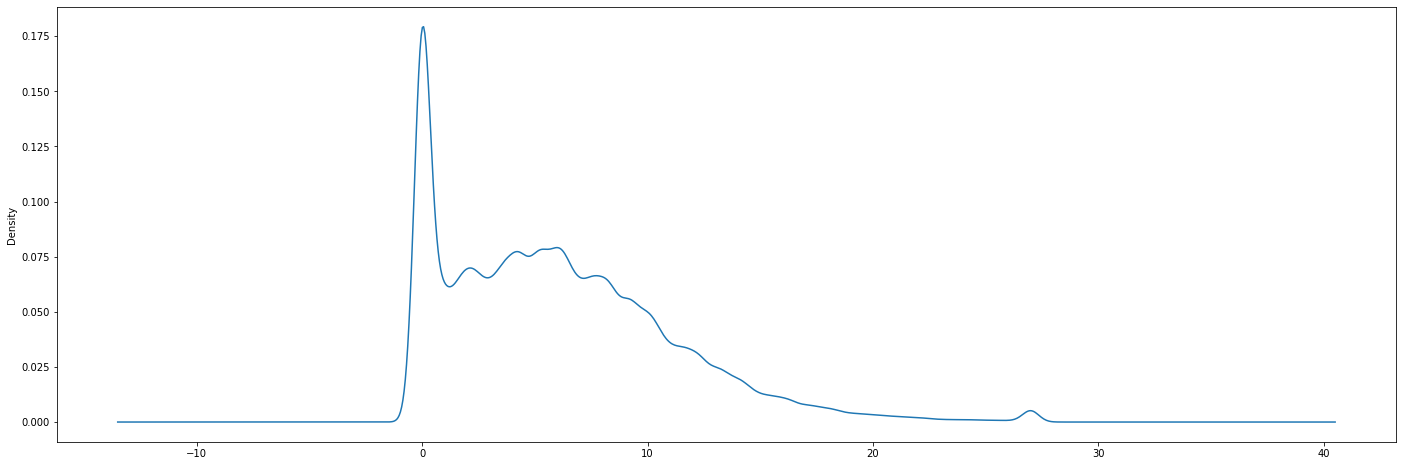

In [26]:

# Fix the Margin variables - is the same for 1 and 2
df_base['y_margin'] = df_base.apply(lambda x : 0 if x.position == '1' else 27 if x.Margin1 > 27 else x.Margin1, axis = 1) # capping at 99%ile of Margin1

df_base['y_margin'].plot(kind = 'density', figsize = (24,8))


In [ ]:

# Checking the 99 percentile of the x_margin variable

#from scipy import stats
#stats.percentileofscore(df_base['x_margin'].values, 15, kind='mean')


In [27]:

df_base.describe()


,@id_DOG,Box,Rug,Weight,Handicap,Margin1,Margin2,Checks,SplitMargin,RunTime,Prizemoney,RaceId,TrainerId,@id_RACE,RaceNum,ft_sp,x_num_dogs,y_margin
count,5.367820e+05,536782.000000,536782.000000,536781.000000,0.0,536782.000000,462162.000000,536782.000000,446420.000000,536782.000000,369340.000000,5.367820e+05,536782.000000,5.367820e+05,536782.000000,536782.000000,536782.000000,536782.000000
mean,4.526384e+08,4.477762,4.584563,29.918423,NaN,6.449292,2.060021,0.576318,7.297971,24.401001,425.664710,7.292602e+08,109616.105311,7.292602e+08,6.152662,16.991305,7.336054,6.029310
std,1.120535e+08,2.344809,2.432678,3.322921,NaN,8.979399,8.162029,1.647500,2.514391,4.949724,3016.878533,5.833205e+07,76306.821982,5.833205e+07,3.274886,21.039273,0.896384,5.037514
min,1.083910e+08,1.000000,1.000000,18.900000,NaN,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,6.238619e+08,6418.000000,6.238619e+08,1.000000,0.260000,5.000000,0.000000
25%,3.836043e+08,2.000000,2.000000,27.200000,NaN,2.500000,0.570000,0.000000,5.500000,20.540000,0.000000,6.801957e+08,65361.000000,6.801957e+08,3.000000,4.200000,7.000000,1.990000
50%,4.517679e+08,4.000000,4.000000,29.900000,NaN,5.500000,1.400000,0.000000,6.790000,23.530000,20.000000,7.290297e+08,99387.000000,7.290297e+08,6.000000,8.800000,8.000000,5.250000
75%,5.274578e+08,7.000000,7.000000,32.500000,NaN,9.010000,2.660000,0.000000,8.760000,27.090000,405.000000,7.792436e+08,123131.000000,7.792436e+08,9.000000,20.800000,8.000000,9.000000
max,2.145360e+09,8.000000,10.000000,55.000000,NaN,5229.500000,5100.140000,25.000000,30.660000,396.120000,1000000.000000,8.292517e+08,335222.000000,8.292517e+08,18.000000,999.990000,8.000000,27.000000


In [29]:

# Top 3 Actuals

##
groupings = ['@id_RACE']

# Actual Result
df_base['Winner_actual'] = df_base.apply(lambda x : 1 if int(x.position) ==1 else 0, axis = 1)
df_base['Top3_actual'] = df_base.apply(lambda x : 1 if int(x.position) <=3 else 0, axis = 1)


In [30]:

# Random Position 
##
groupings = ['@id_RACE']

import random
#print(random.uniform(0, 1))

df_base['rand_mean'] = 0.5
df_base['rand_uniform'] = np.random.normal( df_base['rand_mean'] )

## Rank from the random variables 
df_base["position_random"] = df_base.groupby(groupings)["rand_uniform"].rank("dense", ascending=False)

# Winner / Place Columns
df_base['Winner_random'] = df_base.apply(lambda x : 1 if x.position_random <= 1 else 0, axis = 1)
df_base['Top3_random'] = df_base.apply(lambda x : 1 if x.position_random <= 3 else 0, axis = 1)

print(datetime.now())


2022-11-27 10:07:03.439649


In [31]:

##
groupings = ['@id_RACE']

## Rank for Place Preds
df_base["position_fasttrack"] = df_base.groupby(groupings)["ft_sp"].rank("dense", ascending=True)

# Winner / Place Columns
df_base['Winner_fastrack'] = df_base.apply(lambda x : 1 if x.position_fasttrack <= 1 else 0, axis = 1)
df_base['Top3_fastrack'] = df_base.apply(lambda x : 1 if x.position_fasttrack <= 3 else 0, axis = 1)

print(datetime.now())


2022-11-27 10:07:27.737277


In [32]:

print(pd.DataFrame(df_base.isna().sum()).transpose())


   @id_DOG  Place  DogName  Box  Rug  Weight  StartPrice  Handicap  Margin1  Margin2    PIR  Checks  Comments  SplitMargin  RunTime  Prizemoney  RaceId  TrainerId  TrainerName  @id_RACE  RaceNum  \
0        0      0        0    0    0       1           0    536782        0    74620  71107       0    259643        90362        0      167442       0          0            0         0        0   

   RaceName  RaceTime  Distance  RaceGrade  Track  date  Event_Dt  ft_sp  x_num_dogs  position  y_margin  Winner_actual  Top3_actual  rand_mean  rand_uniform  position_random  Winner_random  \
0        15         0         0          0      0     0         0      0           0         0         0              0            0          0             0                0              0   

   Top3_random  position_fasttrack  Winner_fastrack  Top3_fastrack  
0            0                   0                0              0  


In [33]:

df_base.agg({'TrainerName':'nunique', 'Track':'nunique', 'DogName':'nunique'})


TrainerName     3540
Track             58
DogName        25310
dtype: int64

In [34]:
pd.set_option('display.max_rows', 50)

In [35]:

# Some Track based EDA
tracks_unq = df_base.Track.unique().tolist()

print(type(tracks_unq))

tracks_unq.sort()

print(tracks_unq)


<class 'list'>
['Albion Park', 'Angle Park', 'Ballarat', 'Bathurst', 'Bendigo', 'Broken Hill', 'Bulli', 'Bundaberg', 'Cannington', 'Capalaba', 'Casino', 'Coonamble', 'Cranbourne', 'Dapto', 'Darwin', 'Devonport', 'Dubbo', 'Gawler', 'Geelong', 'Gosford', 'Goulburn', 'Grafton', 'Gunnedah', 'Healesville', 'Hobart', 'Horsham', 'Ipswich', 'Kempsey', 'Launceston', 'Lismore', 'Lithgow', 'Maitland', 'Mandurah', 'Meadows', 'Moree', 'Mount Gambier', 'Murray Bridge', 'Muswellbrook', 'Northam', 'Nowra', 'Potts Park', 'Richmond', 'Rockhampton', 'Sale', 'Sandown Park', 'Shepparton', 'Tamworth', 'Taree', 'Temora', 'The Gardens', 'Townsville', 'Traralgon', 'Wagga', 'Warragul', 'Warrnambool', 'Wauchope', 'Wentworth Park', 'Young']


In [36]:

print(datetime.now().date())


2022-11-27


In [37]:

print(df_base.columns.values.tolist())


['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack']


In [38]:

print(df_base.position.value_counts())


1    74620
2    74533
3    74503
4    74453
5    74453
6    69445
7    55908
8    38867
Name: position, dtype: int64


In [41]:

#keep_cols_for_export = ['@id_DOG', 'DogName', '@id_RACE','RaceName','Track','RaceGrade','Distance','TrainerName','RunTime','Place','x_races_tot']

# 'TrainerName', 'Track' have been dummified
#cols_to_keep = ['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'position', 'ft_sp', 'x_num_dogs', 'Top3_actual', 'position_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'Winner_actual', 'Winner_random', 'Top3_random', 'RaceGrade', 'Track']

cols_for_drop = [ 'Place', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin' \
                 , 'Prizemoney', 'TrainerId', 'TrainerName', 'RaceNum', 'RaceName', 'RaceTime', 'date' \
                 , 'rand_mean', 'rand_uniform']

#'Event_Dt', 

todaydt = datetime.now().date()
exp_fname = f'dataset_base_{todaydt}.csv'

exp_ds = df_base.drop( columns = cols_for_drop ).rename( columns = { 'RunTime' : 'y_runtime' } )
exp_ds['y_pos'] = exp_ds['position'].astype(int)



In [42]:

print(exp_ds.columns.values.tolist())


['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'Winner_actual', 'Top3_actual', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'y_pos']


In [43]:

exp_ds.head()


,@id_DOG,DogName,y_runtime,RaceId,@id_RACE,Distance,RaceGrade,Track,Event_Dt,ft_sp,x_num_dogs,position,y_margin,Winner_actual,Top3_actual,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,y_pos
3729,108390981,DOLLY DOES IT,26.43,626271182,626271182,452m,Mixed 4/5,Devonport,2021-01-05,11.0,8,4,6.0,0,0,3.0,0,1,5.0,0,0,4
9211,108390981,DOLLY DOES IT,26.40,629797242,629797242,452m,Grade 5,Devonport,2021-01-12,7.0,7,5,6.0,0,0,1.0,1,1,5.0,0,0,5
14917,108390981,DOLLY DOES IT,26.20,629797513,629797513,452m,Grade 5,Devonport,2021-01-19,7.0,7,1,0.0,1,1,6.0,0,0,4.0,0,0,1
37110,108390981,DOLLY DOES IT,26.48,638810808,638810808,452m,Mixed 4/5 Heat,Devonport,2021-02-16,7.0,8,7,10.5,0,0,2.0,0,1,4.0,0,0,7
48421,108390981,DOLLY DOES IT,26.91,643554706,643554706,452m,Grade 4,Devonport,2021-03-02,91.0,8,8,18.5,0,0,7.0,0,0,8.0,0,0,8


In [44]:

exp_ds.describe()


,@id_DOG,y_runtime,RaceId,@id_RACE,ft_sp,x_num_dogs,y_margin,Winner_actual,Top3_actual,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,y_pos
count,5.367820e+05,536782.000000,5.367820e+05,5.367820e+05,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000
mean,4.526384e+08,24.401001,7.292602e+08,7.292602e+08,16.991305,7.336054,6.029310,0.139014,0.416661,4.168027,0.138749,0.416247,4.028419,0.144332,0.434445,4.166000
std,1.120535e+08,4.949724,5.833205e+07,5.833205e+07,21.039273,0.896384,5.037514,0.345961,0.493006,2.160860,0.345685,0.492936,2.089659,0.351427,0.495684,2.160989
min,1.083910e+08,10.000000,6.238619e+08,6.238619e+08,0.260000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,3.836043e+08,20.540000,6.801957e+08,6.801957e+08,4.200000,7.000000,1.990000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000
50%,4.517679e+08,23.530000,7.290297e+08,7.290297e+08,8.800000,8.000000,5.250000,0.000000,0.000000,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,4.000000
75%,5.274578e+08,27.090000,7.792436e+08,7.792436e+08,20.800000,8.000000,9.000000,0.000000,1.000000,6.000000,0.000000,1.000000,6.000000,0.000000,1.000000,6.000000
max,2.145360e+09,396.120000,8.292517e+08,8.292517e+08,999.990000,8.000000,27.000000,1.000000,1.000000,8.000000,1.000000,1.000000,8.000000,1.000000,1.000000,8.000000


In [45]:

exp_ds.to_csv(f'{fileloc}/{exp_fname}', index = False)


In [46]:

print('THE END')


THE END
